In [1]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,accuracy_score

data = pd.read_csv("C:\\Users\\Anik\\Desktop\\a.csv")

X = data[['NDVI', 'TreeDensity', 'CanopyHeight', 'Texture']]
y = data['CarbonStock']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)

rf_regressor.fit(X_train, y_train)

y_pred = rf_regressor.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
print('Mean Squared Error:', mse)

new_data = [[0.78, 310, 20, 0.04]] 
predicted_carbon_stock = rf_regressor.predict(new_data)
print('Predicted Carbon Stock:', predicted_carbon_stock)
from sklearn.metrics import mean_absolute_error

mae = mean_absolute_error(y_test, y_pred)
print('Mean Absolute Error:', mae)




Mean Squared Error: 0.6074249999999974
Predicted Carbon Stock: [50.49]
Mean Absolute Error: 0.6274999999999995


C:\Users\Anik\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


In [2]:
from sklearn.metrics import r2_score

r_squared = r2_score(y_test, y_pred)
print('R-squared:', r_squared)


R-squared: 0.8650166666666672


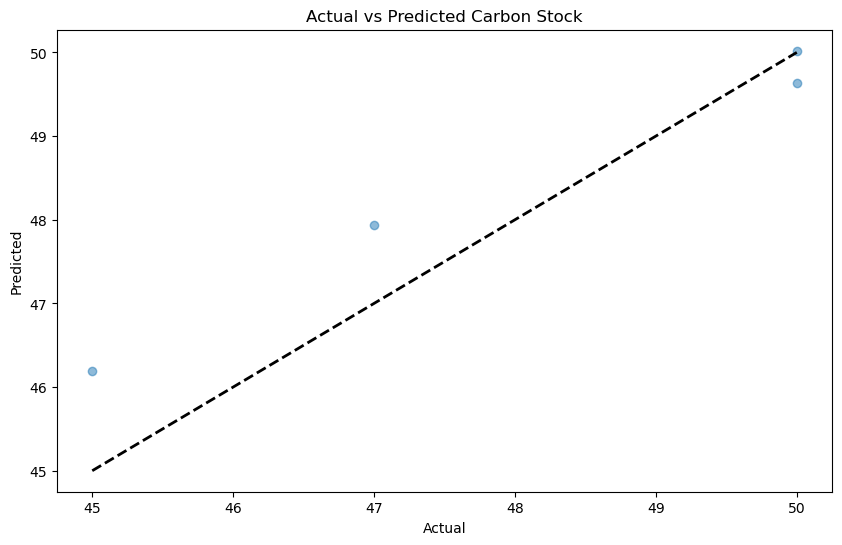

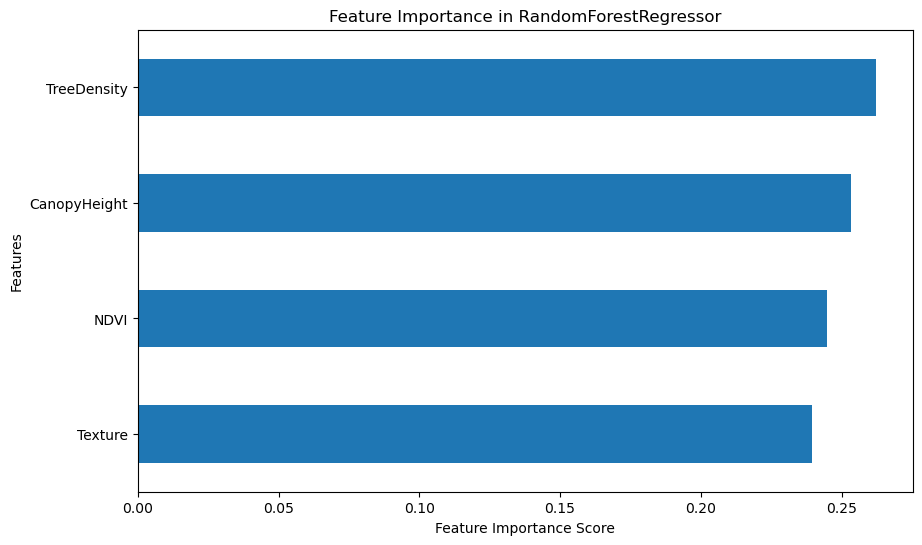

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted Carbon Stock')
plt.show()

feature_importances = pd.Series(rf_regressor.feature_importances_, index=X.columns)
feature_importances.sort_values().plot(kind='barh', figsize=(10, 6))
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title('Feature Importance in RandomForestRegressor')
plt.show()
